In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings("ignore")

sns.set_style('darkgrid')

import scipy.stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, r2_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from category_encoders import TargetEncoder

import scipy.stats as stats
from scipy.stats import norm
import statsmodels.api as sm
from scipy.stats import skew, norm
from sklearn.neighbors import KNeighborsRegressor



%matplotlib inline

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.min_rows', 20)

In [3]:
df=pd.read_csv("train.csv")

In [4]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

# Exploratory Data Analysis

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,1460.0,730.500000,421.610009,1.0,365.75,730.5,1095.25,1460.0
MSSubClass,1460.0,56.897260,42.300571,20.0,20.00,50.0,70.00,190.0
LotFrontage,1201.0,70.049958,24.284752,21.0,59.00,69.0,80.00,313.0
LotArea,1460.0,10516.828082,9981.264932,1300.0,7553.50,9478.5,11601.50,215245.0
OverallQual,1460.0,6.099315,1.382997,1.0,5.00,6.0,7.00,10.0
OverallCond,1460.0,5.575342,1.112799,1.0,5.00,5.0,6.00,9.0
YearBuilt,1460.0,1971.267808,30.202904,1872.0,1954.00,1973.0,2000.00,2010.0
YearRemodAdd,1460.0,1984.865753,20.645407,1950.0,1967.00,1994.0,2004.00,2010.0
MasVnrArea,1452.0,103.685262,181.066207,0.0,0.00,0.0,166.00,1600.0
BsmtFinSF1,1460.0,443.639726,456.098091,0.0,0.00,383.5,712.25,5644.0


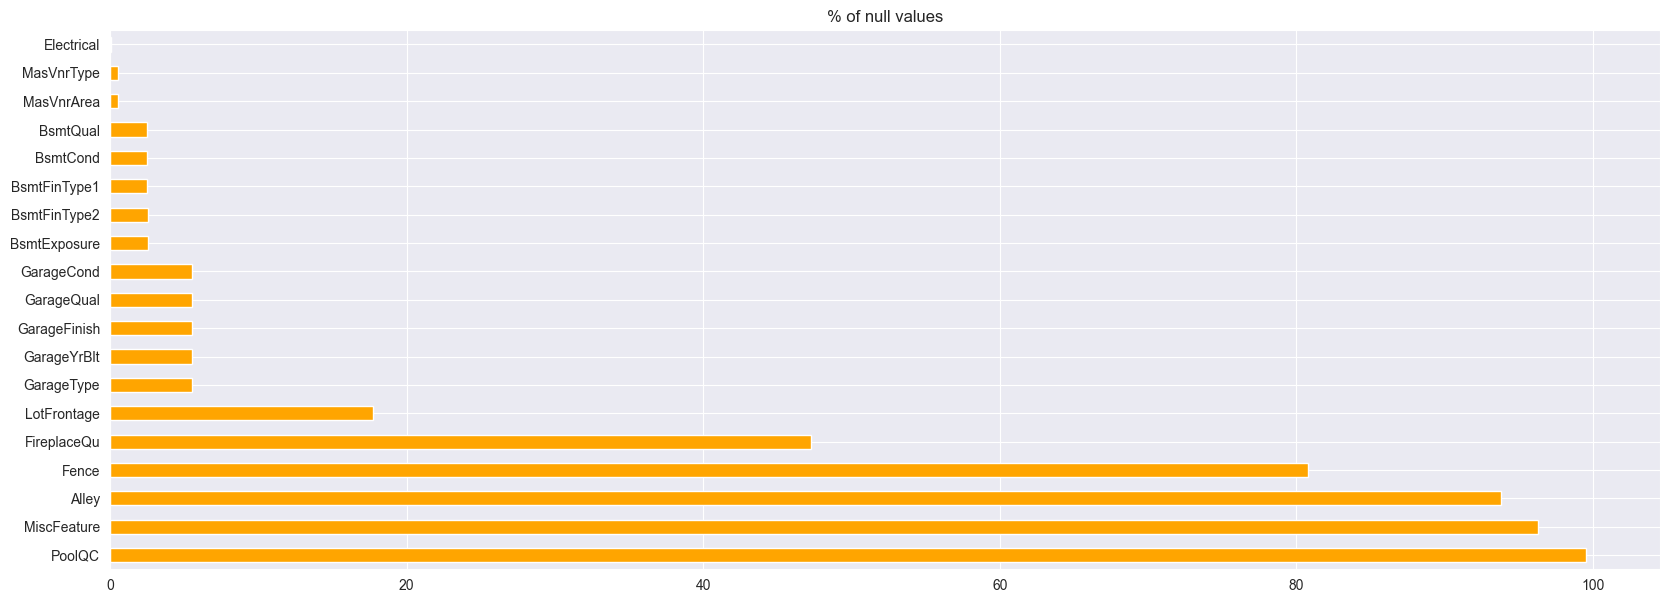

In [7]:
null=df.isna().sum()
null=null[null>0].sort_values(ascending=False)/len(df)*100
null.plot(kind="barh", title="% of null values", figsize=(20,7), color="orange");

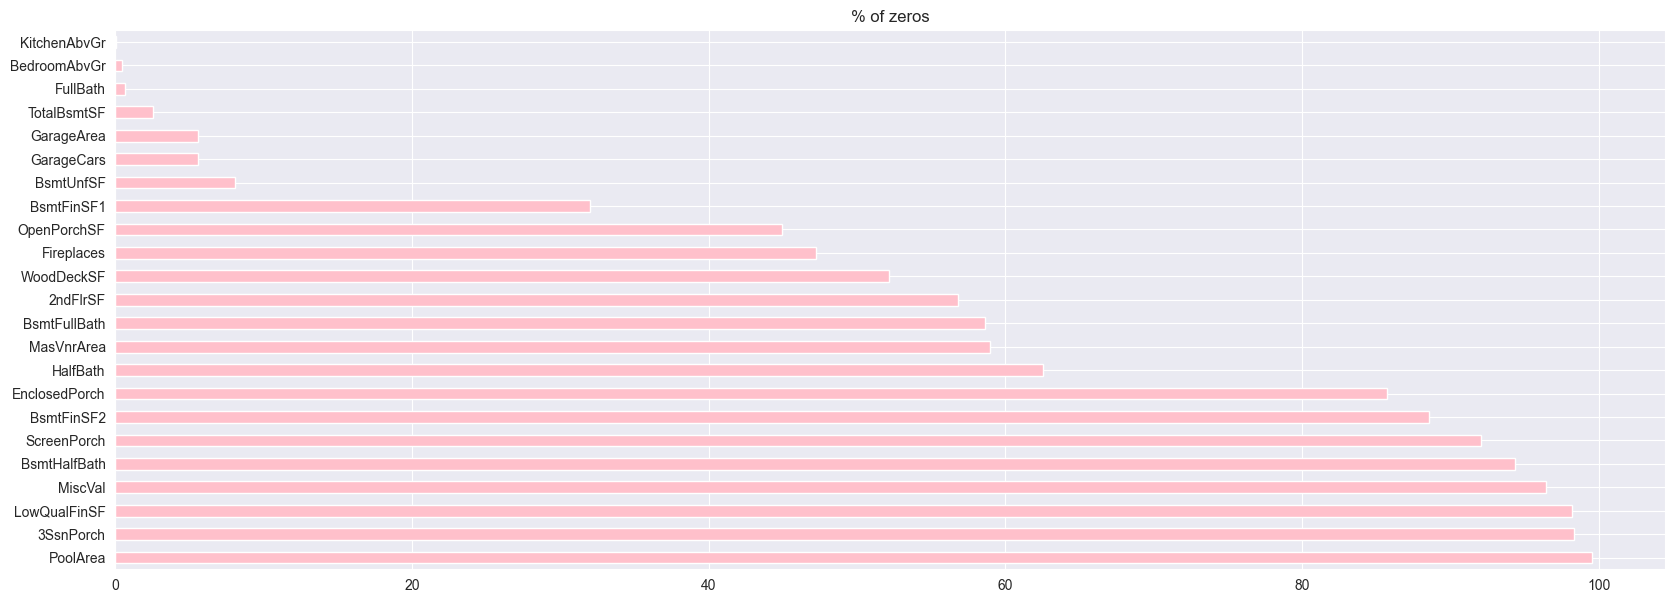

In [8]:
zeros=(df==0).sum()
zeros=zeros[zeros>0].sort_values(ascending=False)/len(df)*100
zeros.plot(kind="barh", title="% of zeros", color="pink", figsize=(20,7));

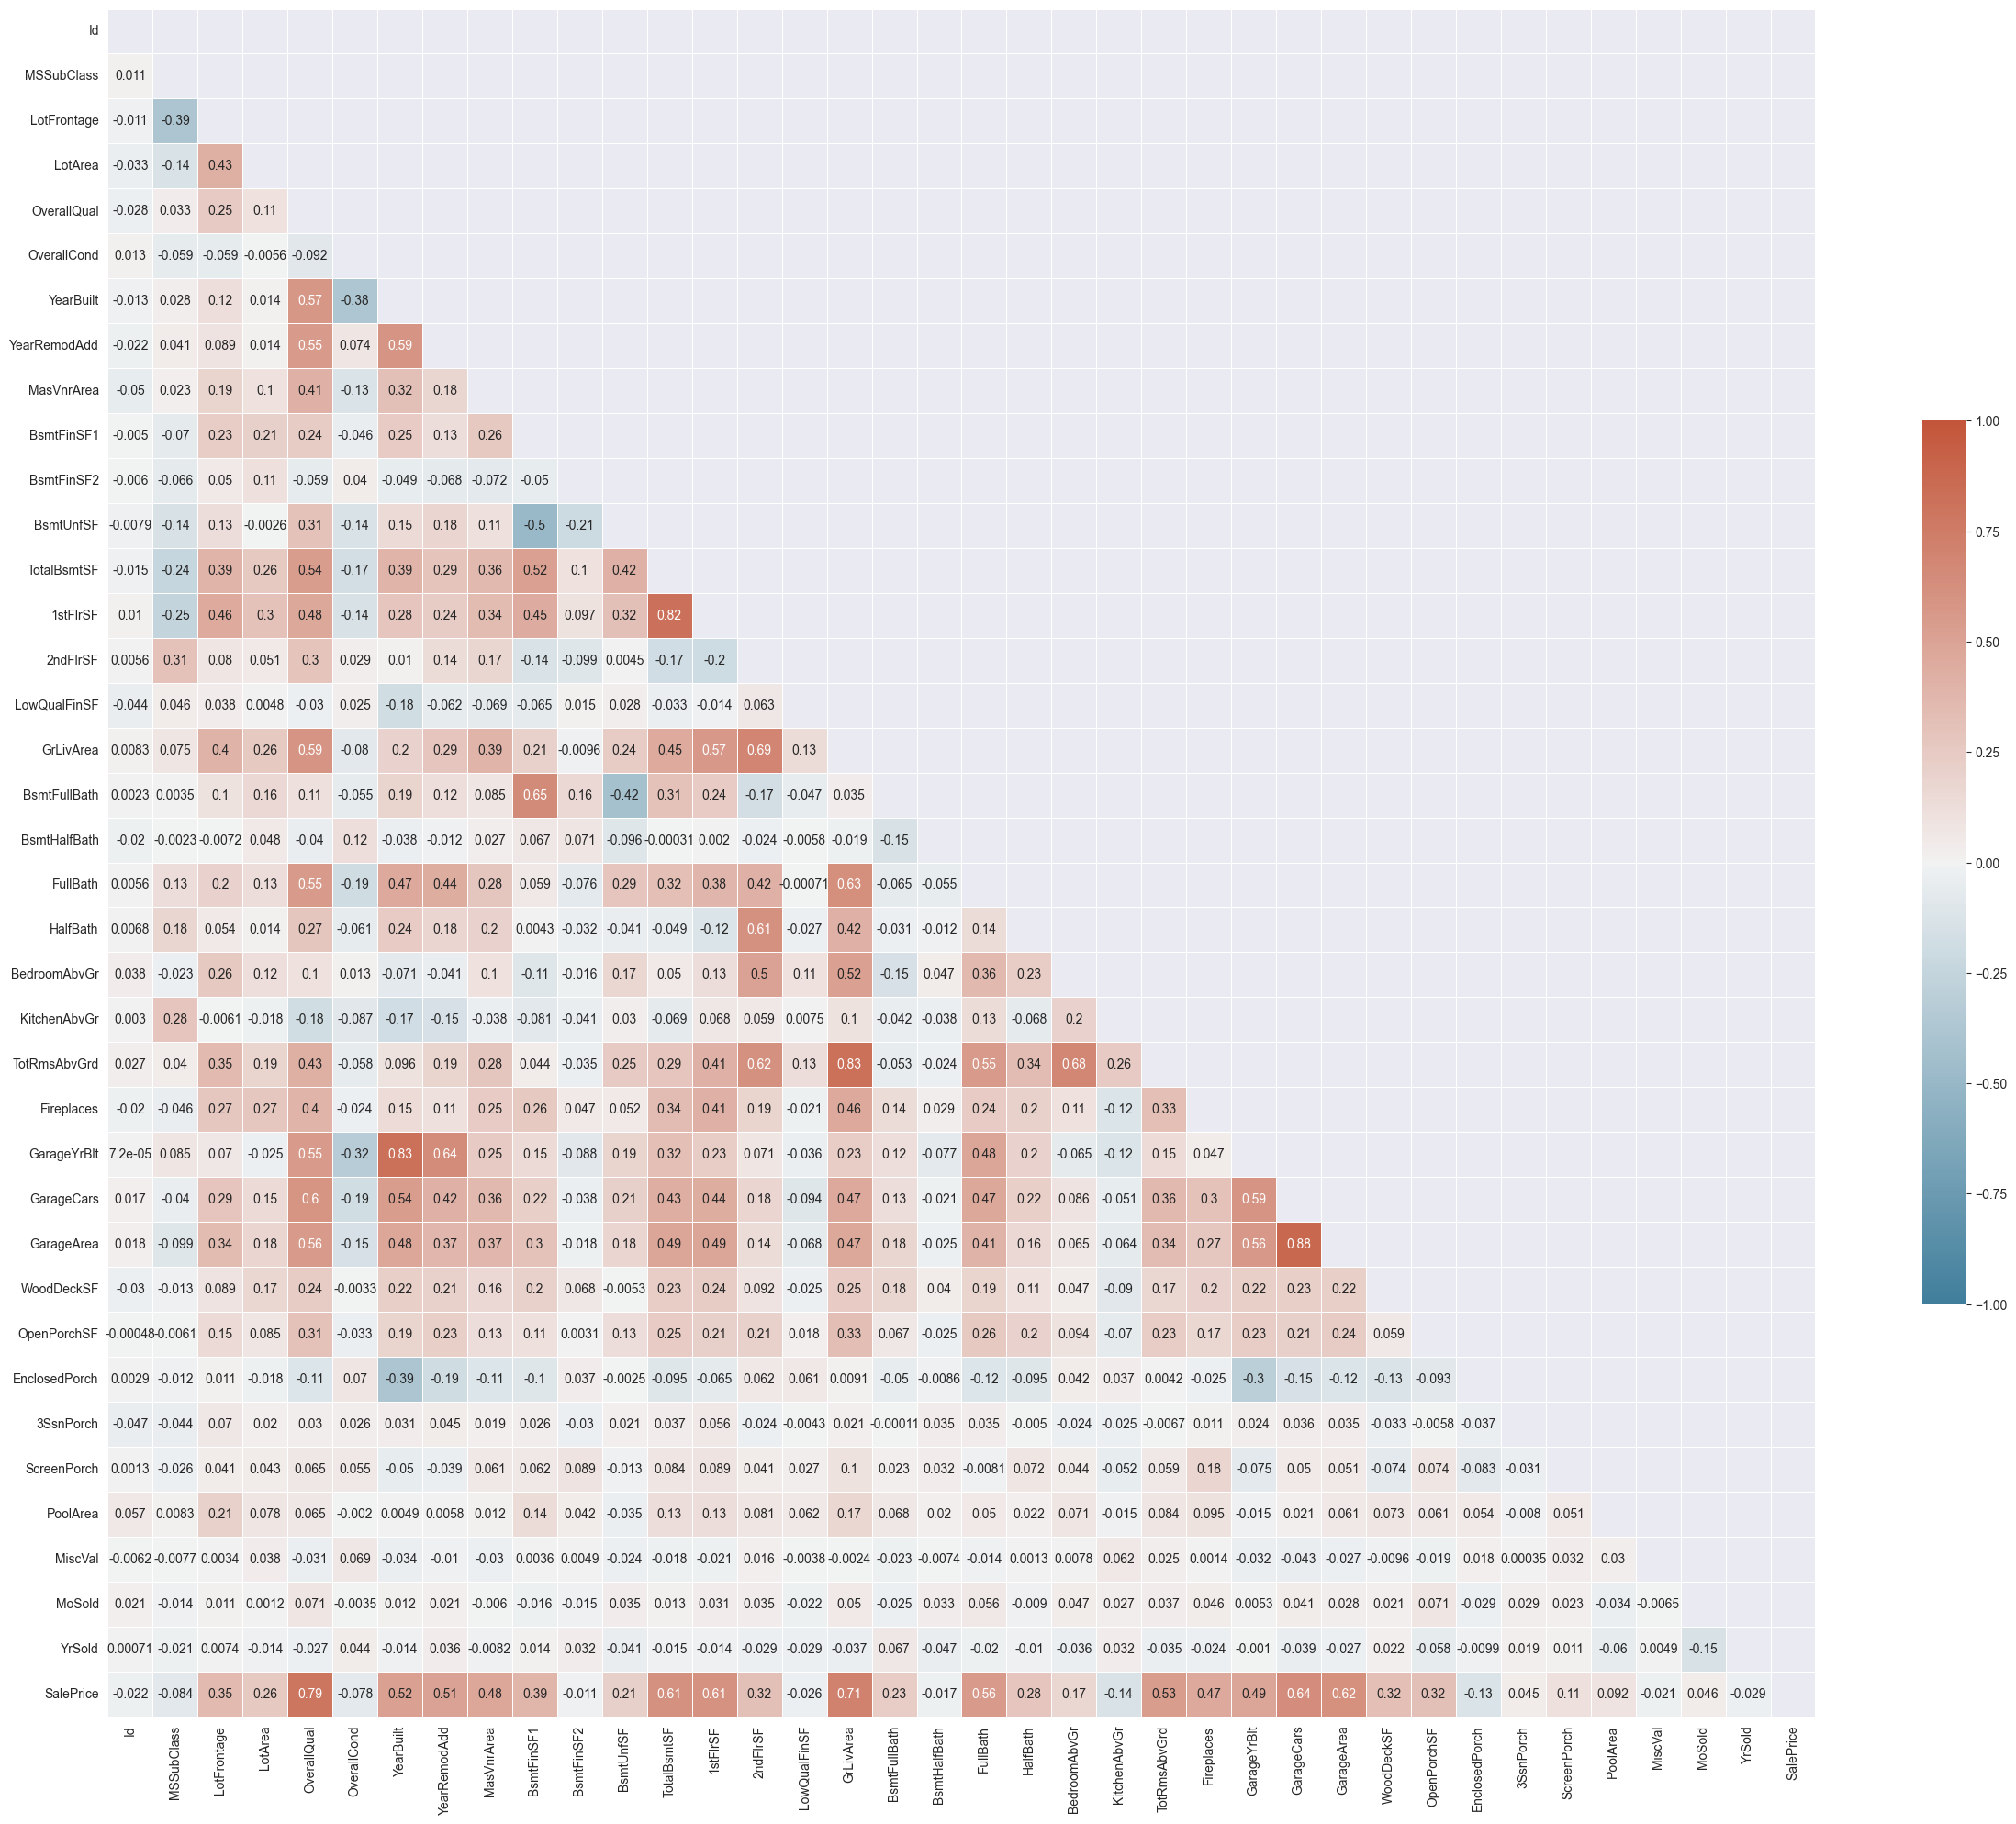

In [9]:
f, ax = plt.subplots(figsize=(30, 25))
mat = df.corr('pearson')
mask = np.triu(np.ones_like(mat, dtype=bool))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(mat, mask=mask, cmap=cmap, vmax=1,vmin=-1, center=0, annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [10]:
df_num=df.select_dtypes(np.number)
df_str=df.select_dtypes(np.object)

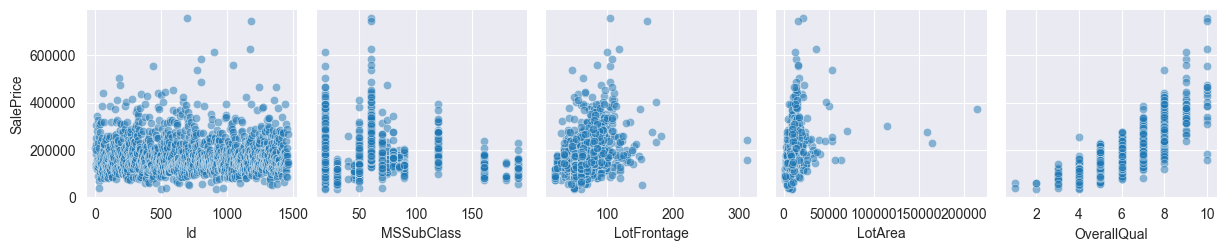

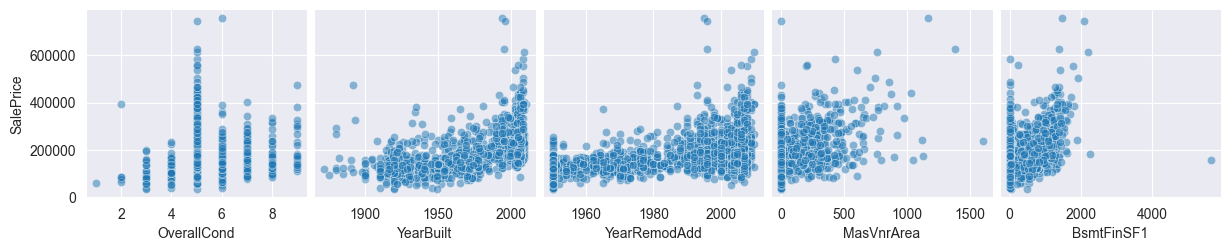

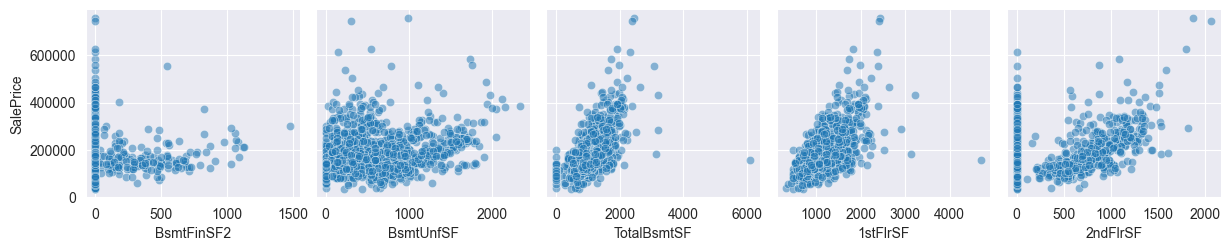

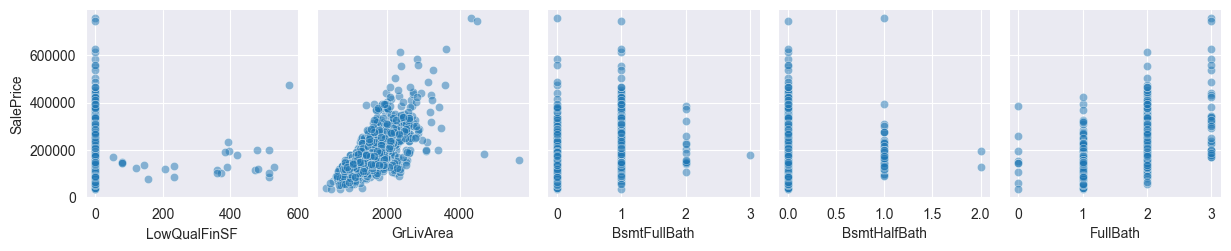

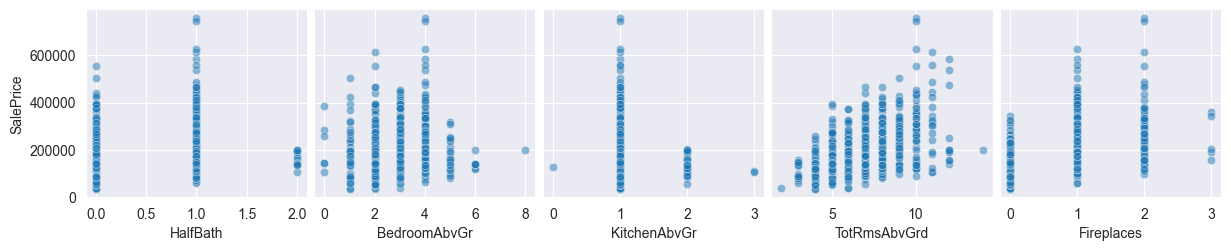

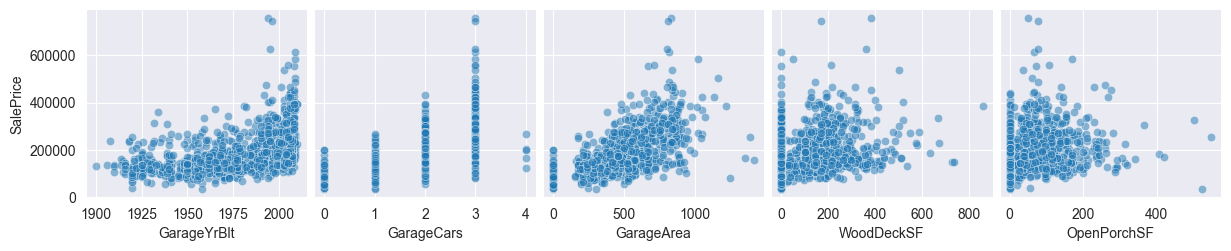

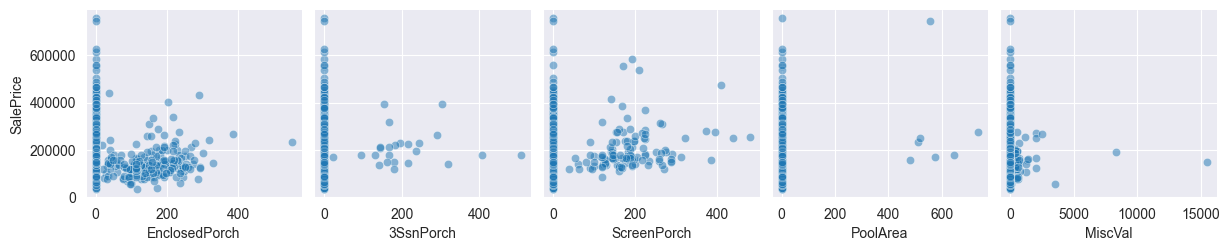

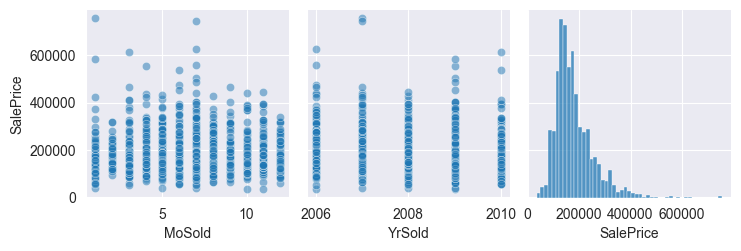

In [11]:
for i in range(0, len(df_num.columns), 5):
    sns.pairplot(df_num, x_vars=df_num.columns[i:i+5], y_vars=["SalePrice"],plot_kws={'alpha':0.5})

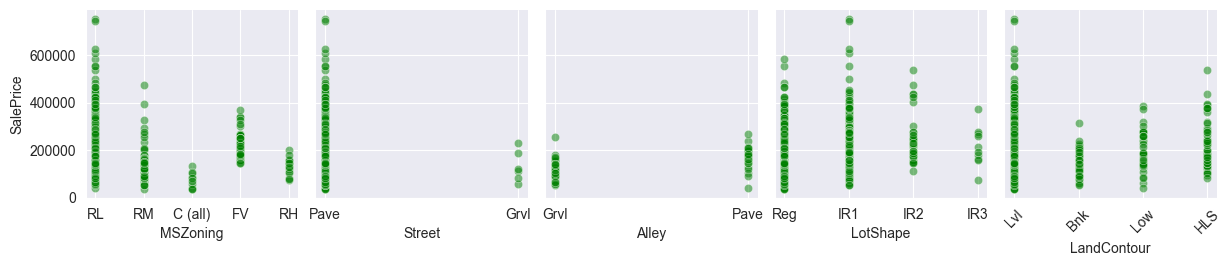

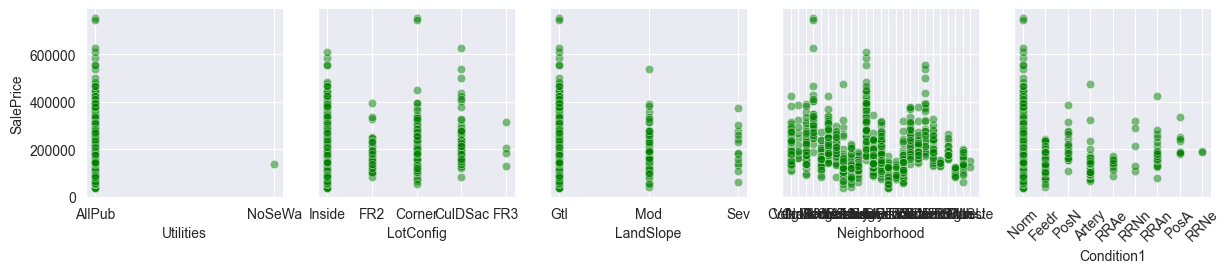

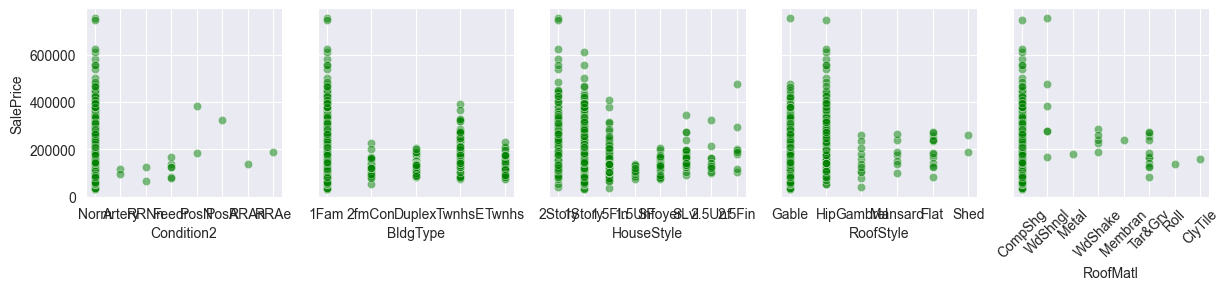

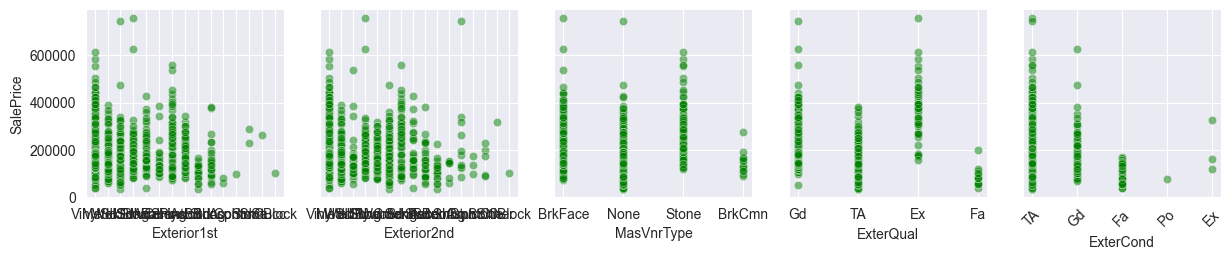

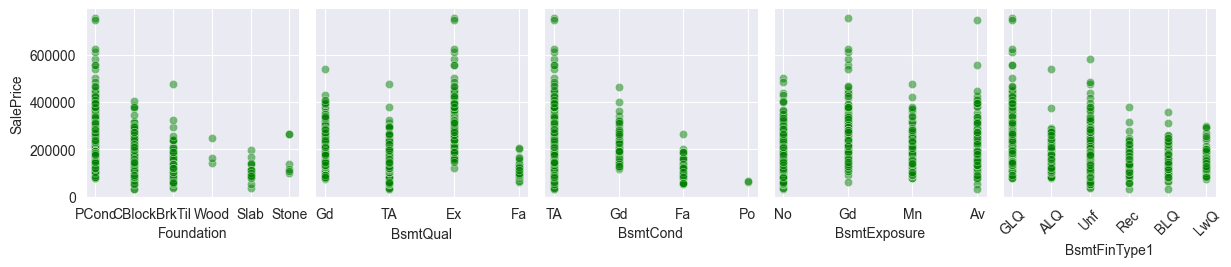

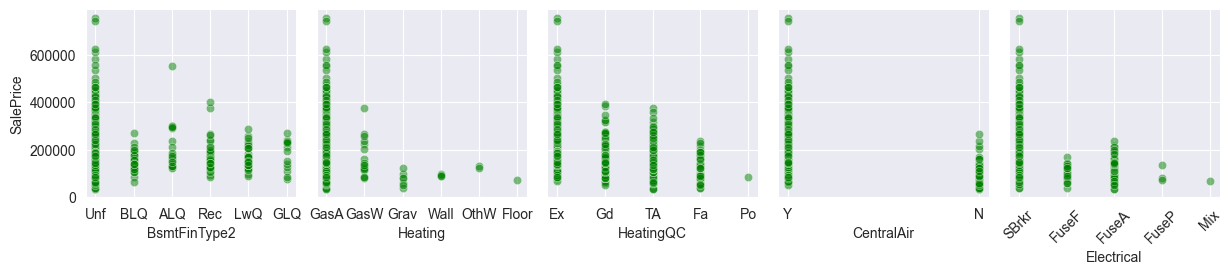

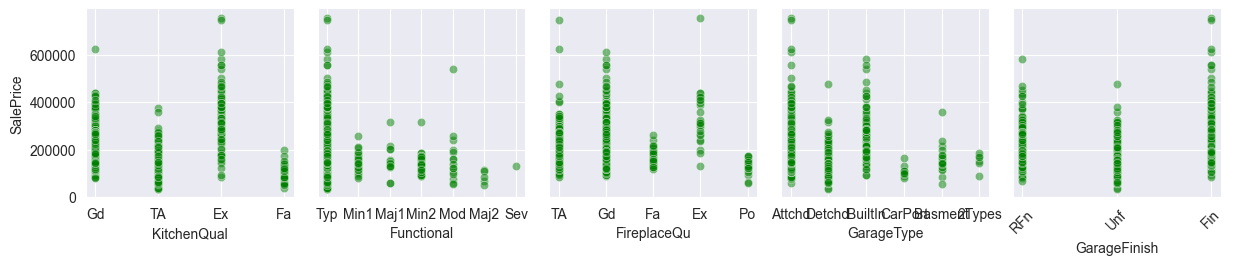

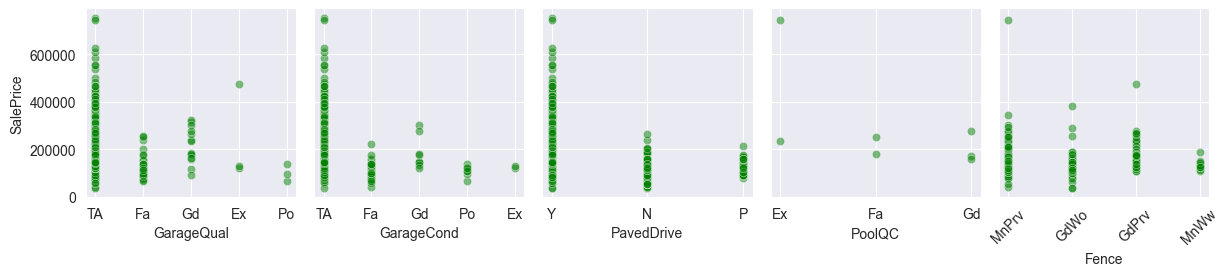

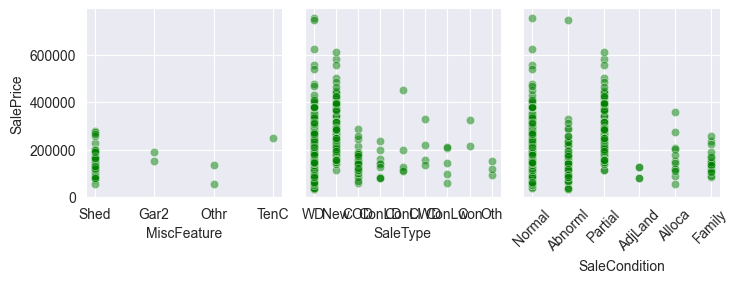

In [12]:
for i in range(0, len(df_str.columns), 5):
    sns.pairplot(df, x_vars=df_str.columns[i:i+5], y_vars=["SalePrice"],plot_kws={'alpha':0.5, 'color':'green'})
    plt.xticks(rotation=45);

In [13]:
df_num.head()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


# Combine train and test sets

In [14]:
train0=pd.read_csv("train.csv")
test0=pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

In [15]:
target = train0['SalePrice']
test_id = test0['Id']

train1 = train0.drop(['Id', 'SalePrice'], axis=1)
test1 = test0.drop('Id', axis=1)

df1 = pd.concat([train1, test1], axis=0).reset_index(drop=True)
df1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706.0,Unf,0.0,150.0,856.0,GasA,Ex,Y,SBrkr,856,854,0,1710,1.0,0.0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978.0,Unf,0.0,284.0,1262.0,GasA,Ex,Y,SBrkr,1262,0,0,1262,0.0,1.0,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486.0,Unf,0.0,434.0,920.0,GasA,Ex,Y,SBrkr,920,866,0,1786,1.0,0.0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216.0,Unf,0.0,540.0,756.0,GasA,Gd,Y,SBrkr,961,756,0,1717,1.0,0.0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655.0,Unf,0.0,490.0,1145.0,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1.0,0.0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal


In [16]:
df1['MSSubClass'] = df1['MSSubClass'].astype(str)

# Fill Categorical Missing Values

In [17]:
for column in [
    'Alley',
    'BsmtQual',
    'BsmtCond',
    'BsmtExposure',
    'BsmtFinType1',
    'BsmtFinType2',
    'FireplaceQu',
    'GarageType',
    'GarageFinish',
    'GarageQual',
    'GarageCond',
    'PoolQC',
    'Fence',
    'MiscFeature'
]:
    df1[column] = df1[column].fillna("None")


for column in [
    'MSZoning',
    'Utilities',
    'Exterior1st',
    'Exterior2nd',
    'MasVnrType',
    'Electrical',
    'KitchenQual',
    'Functional',
    'SaleType'
]:
    df1[column] = df1[column].fillna(df1[column].mode()[0])

In [18]:
df2=df1.copy()

In [19]:
def knn_impute(df, na_target):
    df = df.copy()
    
    numeric_df = df.select_dtypes(np.number)
    non_na_columns = numeric_df.loc[: ,numeric_df.isna().sum() == 0].columns
    
    y_train = numeric_df.loc[numeric_df[na_target].isna() == False, na_target]
    X_train = numeric_df.loc[numeric_df[na_target].isna() == False, non_na_columns]
    X_test = numeric_df.loc[numeric_df[na_target].isna() == True, non_na_columns]
    
    knn = KNeighborsRegressor()
    knn.fit(X_train, y_train)
    
    y_pred = knn.predict(X_test)
    
    df.loc[df[na_target].isna() == True, na_target] = y_pred
    
    return df

In [20]:
for column in [
    'LotFrontage',
    'MasVnrArea',
    'BsmtFinSF1',
    'BsmtFinSF2',
    'BsmtUnfSF',
    'TotalBsmtSF',
    'BsmtFullBath',
    'BsmtHalfBath',
    'GarageYrBlt',
    'GarageCars',
    'GarageArea'
]:
    df2 = knn_impute(df2, column)

In [21]:
df3 = df2.copy()

# Feature Transformations

In [22]:
scipy.stats.skew(df3.select_dtypes(np.number))

array([ 1.34075114, 12.8224314 ,  0.19711045,  0.57031205, -0.59980555,
       -0.45102038,  2.60368152,  1.42551624,  4.14611071,  0.91932181,
        1.16280584,  1.46960442,  0.86167475, 12.088761  ,  1.26935769,
        0.62437257,  3.93159384,  0.16760573,  0.69456649,  0.32632435,
        4.30225437,  0.75836691,  0.7334946 , -0.34632694, -0.21859252,
        0.24089573,  1.84243281,  2.53511373,  4.00389122, 11.37606468,
        3.9466937 , 16.89832792, 21.94719481,  0.19588394,  0.13239881])

In [23]:
skew_df = pd.DataFrame(df3.select_dtypes(np.number).columns, columns=['Feature'])
skew_df['Skew'] = skew_df['Feature'].apply(lambda x: scipy.stats.skew(df3[x]))
skew_df['Absolute Skew'] = skew_df['Skew'].apply(abs)
skew_df['Skewed'] = skew_df['Absolute Skew'].apply(lambda x: True if x >= 0.5 else False)
skew_df

,Feature,Skew,Absolute Skew,Skewed
0,LotFrontage,1.340751,1.340751,True
1,LotArea,12.822431,12.822431,True
2,OverallQual,0.197110,0.197110,False
3,OverallCond,0.570312,0.570312,True
4,YearBuilt,-0.599806,0.599806,True
5,YearRemodAdd,-0.451020,0.451020,False
6,MasVnrArea,2.603682,2.603682,True
7,BsmtFinSF1,1.425516,1.425516,True
8,BsmtFinSF2,4.146111,4.146111,True
9,BsmtUnfSF,0.919322,0.919322,True


In [24]:
#skew_df.query("Skewed==True")

In [25]:
df3[skew_df[skew_df["Skewed"]==True]["Feature"].values].describe().T

,count,mean,std,min,25%,50%,75%,max
LotFrontage,2919.0,70.154916,22.697641,21.0,60.0,70.0,80.1,313.0
LotArea,2919.0,10168.114080,7886.996359,1300.0,7478.0,9453.0,11570.0,215245.0
OverallCond,2919.0,5.564577,1.113131,1.0,5.0,5.0,6.0,9.0
YearBuilt,2919.0,1971.312778,30.291442,1872.0,1953.5,1973.0,2001.0,2010.0
MasVnrArea,2919.0,102.189654,178.934095,0.0,0.0,0.0,164.0,1600.0
BsmtFinSF1,2919.0,441.332580,455.559081,0.0,0.0,368.0,733.0,5644.0
BsmtFinSF2,2919.0,49.576841,169.176867,0.0,0.0,0.0,0.0,1526.0
BsmtUnfSF,2919.0,560.797670,439.470508,0.0,220.0,467.0,805.0,2336.0
TotalBsmtSF,2919.0,1051.679822,440.722380,0.0,793.0,989.0,1302.0,6110.0
1stFlrSF,2919.0,1159.581706,392.362079,334.0,876.0,1082.0,1387.5,5095.0


In [26]:
skew_features=skew_df[skew_df["Skewed"]==True]["Feature"].values

#### for each skew features is been using log transformation with 1+ shift

In [27]:
for i in skew_features:
    df3[i]=np.log1p(df3[i])

### month feature is a cycle so using cos can be a method for transformation to "MoSold" feature

In [28]:
df3["MoSold"].unique()

array([ 2,  5,  9, 12, 10,  8, 11,  4,  1,  7,  3,  6], dtype=int64)

In [29]:
df3["MoSold"]=-np.cos(0.5236*df3["MoSold"]) # Cosine Transform for Cyclical Features

In [30]:
df4=df3.copy()

# split data

In [31]:
X_train=df4.loc[:train0.index.max(),:]
X_test=df4.loc[train0.index.max() + 1:, :].reset_index(drop=True)

In [32]:
y_train=df["SalePrice"]

In [33]:
X_train

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,4.189655,9.042040,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,7.602900,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.283204,Gd,TA,PConc,Gd,TA,No,GLQ,6.561031,Unf,0.000000,5.017280,6.753438,GasA,Ex,Y,SBrkr,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,Gd,2.197225,Typ,0.000000,None,Attchd,2003.0,RFn,2.0,548.0,TA,TA,Y,0.000000,4.127134,0.000000,0.000000,0.0,0.0,None,None,None,0.000000,-0.499998,2008,WD,Normal
1,20,RL,4.394449,9.169623,Pave,None,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,2.197225,7.589336,1976,Gable,CompShg,MetalSd,MetalSd,None,0.000000,TA,TA,CBlock,Gd,TA,Gd,ALQ,6.886532,Unf,0.000000,5.652489,7.141245,GasA,Ex,Y,SBrkr,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,TA,1.945910,Typ,0.693147,TA,Attchd,1976.0,RFn,2.0,460.0,TA,TA,Y,5.700444,0.000000,0.000000,0.000000,0.0,0.0,None,None,None,0.000000,0.866028,2007,WD,Normal
2,60,RL,4.234107,9.328212,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,1.791759,7.601902,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.093750,Gd,TA,PConc,Gd,TA,Mn,GLQ,6.188264,Unf,0.000000,6.075346,6.825460,GasA,Ex,Y,SBrkr,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,Gd,1.945910,Typ,0.693147,TA,Attchd,2001.0,RFn,2.0,608.0,TA,TA,Y,0.000000,3.761200,0.000000,0.000000,0.0,0.0,None,None,None,0.000000,-0.000011,2008,WD,Normal
3,70,RL,4.110874,9.164401,Pave,None,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,1.791759,7.557995,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.000000,TA,TA,BrkTil,TA,Gd,No,ALQ,5.379897,Unf,0.000000,6.293419,6.629363,GasA,Gd,Y,SBrkr,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000000,3,0.693147,Gd,2.079442,Typ,0.693147,Gd,Detchd,1998.0,Unf,3.0,642.0,TA,TA,Y,0.000000,3.583519,5.609472,0.000000,0.0,0.0,None,None,None,0.000000,-0.499998,2006,WD,Abnorml
4,60,RL,4.442651,9.565284,Pave,None,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,1.791759,7.601402,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,5.860786,Gd,TA,PConc,Gd,TA,Av,GLQ,6.486161,Unf,0.000000,6.196444,7.044033,GasA,Ex,Y,SBrkr,7.044033,6.960348,0.0,7.695758,0.693147,0.000000,2,0.693147,4,0.693147,Gd,2.302585,Typ,0.693147,TA,Attchd,2000.0,RFn,3.0,836.0,TA,TA,Y,5.262690,4.442651,0.000000,0.000000,0.0,0.0,None,None,None,0.000000,-1.000000,2008,WD,Normal
5,50,RL,4.454347,9.555064,Pave,None,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,1.791759,7.597898,1995,Gable,CompShg,VinylSd,VinylSd,None,0.000000,TA,TA,Wood,Gd,TA,No,GLQ,6.597146,Unf,0.000000,4.174387,6.680855,GasA,Ex,Y,SBrkr,6.680855,6.340359,0.0,7.217443,0.693147,0.000000,1,0.693147,1,0.693147,TA,1.791759,Typ,0.000000,None,Attchd,1993.0,Unf,2.0,480.0,TA,TA,Y,3.713572,3.433987,0.000000,5.771441,0.0,0.0,None,MnPrv,Shed,6.552508,-0.500011,2009,WD,Normal
6,20,RL,4.330733,9.218804,Pave,None,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,1.791759,7.603399,2005,Gable,CompShg,VinylSd,VinylSd,Stone,5.231109,Gd,TA,PConc,Ex,TA,Av,GLQ,7.222566,Unf,0.000000,5.762051,7.430707,GasA,Ex,Y,SBrkr,7.435438,0.000000,0.0,7.435438,0.693147,0.000000,2,0.000000,3,0.693147,Gd,2.079442,T

# Target encoding to categorical features

In [34]:
te=TargetEncoder()
X_train=te.fit_transform(X_train, y_train)
X_test=te.transform(X_test)

In [35]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,239948.501672,191004.994787,4.189655,9.042040,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,176938.047529,179956.799566,197965.734807,184495.492063,181169.405536,185763.807377,210051.764045,7,1.791759,7.602900,2003,171483.956179,179803.679219,213732.900971,214432.460317,204691.871910,5.283204,231633.510246,184034.896256,225230.442040,202688.478964,183632.62090,165652.295908,235413.720096,6.561031,184694.690287,0.0,5.017280,6.753438,182021.195378,214914.429150,186186.70989,186810.637453,6.753438,6.751101,0.0,7.444833,0.693147,0.000000,2,0.693147,3,0.693147,212116.023891,2.197225,183429.147059,0.000000,141331.482609,202892.656322,2003.0,202068.869668,2.0,548.0,187489.836003,187885.735294,186433.973881,0.000000,4.127134,0.000000,0.0,0.0,0.0,180404.663455,187596.837998,182046.410384,0.0,-0.499998,2008,173401.836622,175202.219533
1,185224.811567,191004.994787,4.394449,9.169623,181130.538514,183452.131483,164754.818378,180183.746758,180950.95682,178122.652042,179956.799566,197643.209810,142561.517167,181169.405536,185763.807377,175985.477961,6,2.197225,7.589336,1976,171483.956179,179803.679219,149422.177338,149803.173014,156958.243119,0.000000,144341.313466,184034.896256,149805.714511,202688.478964,183632.62090,257688.946518,161573.068222,6.886532,184694.690287,0.0,5.652489,7.141245,182021.195378,214914.429150,186186.70989,186810.637453,7.141245,0.000000,0.0,7.141245,0.000000,0.693147,2,0.000000,3,0.693147,139962.511565,1.945910,183429.147059,0.693147,205723.488818,202892.656322,1976.0,202068.869668,2.0,460.0,187489.836003,187885.735294,186433.973881,5.700444,0.000000,0.000000,0.0,0.0,0.0,180404.663455,187596.837998,182046.410384,0.0,0.866028,2007,173401.836622,175202.219533
2,239948.501672,191004.994787,4.234107,9.328212,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,176938.047529,179956.799566,197965.734807,184495.492063,181169.405536,185763.807377,210051.764045,7,1.791759,7.601902,2002,171483.956179,179803.679219,213732.900971,214432.460317,204691.871910,5.093750,231633.510246,184034.896256,225230.442040,202688.478964,183632.62090,192788.676169,235413.720096,6.188264,184694.690287,0.0,6.075346,6.825460,182021.195378,214914.429150,186186.70989,186810.637453,6.825460,6.765039,0.0,7.488294,0.693147,0.000000,2,0.693147,3,0.693147,212116.023891,1.945910,183429.147059,0.693147,205723.488818,202892.656322,2001.0,202068.869668,2.0,608.0,187489.836003,187885.735294,186433.973881,0.000000,3.761200,0.000000,0.0,0.0,0.0,180404.663455,187596.837998,182046.410384,0.0,-0.000011,2008,173401.836622,175202.219533
3,167026.899580,191004.994787,4.110874,9.164401,181130.538514,183452.131483,206101.665289,180183.746758,180950.95682,181623.425855,179956.799566,209344.287867,184495.492063,181169.405536,185763.807377,210051.764045,7,1.791759,7.557995,1970,171483.956179,179803.679219,149841.645891,164108.128685,156958.243119,0.000000,144341.313466,184034.896256,132291.239323,140759.818182,213240.86856,165652.295908,161573.068222,5.379897,184694.690287,0.0,6.293419,6.629363,182021.195378,156858.871375,186186.70989,186810.637453,6.869014,6.629363,0.0,7.448916,0.693147,0.000000,1,0.000

In [36]:
df_sc=X_train

# Scale data

In [37]:
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [38]:
X_train = pd.DataFrame(X_train, index=df_sc.index, columns=df_sc.columns)

In [39]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1.528277,0.383065,-0.094228,-0.133270,0.064238,0.221708,-0.742315,-0.047759,0.02618,-0.343744,-0.233102,0.323832,0.301053,0.042379,0.330435,1.309871,0.651479,-0.460408,1.045180,0.878668,-0.504593,-0.083862,1.094614,1.137985,0.695872,1.192930,0.945153,0.295125,1.109017,0.396372,0.137033,-0.516154,1.509903,0.779431,0.298006,-0.355342,-0.340511,0.002513,0.13181,0.970381,0.263813,0.302742,-0.803645,1.180528,-0.133602,0.529194,1.148788,-0.242923,0.789741,1.258580,0.163779,-0.207607,0.580336,0.946985,0.249723,-1.013562,-0.984873,0.546723,1.027148,0.481457,0.311725,0.351000,0.306071,0.29867,0.29258,-0.946701,0.845209,-0.404244,-0.128521,-0.292769,-0.069393,-0.045717,0.444615,0.18859,-0.190481,-1.266948,0.138777,-0.271915,-0.215091
1,0.076144,0.383065,0.511302,0.113413,0.064238,0.221708,-0.742315,-0.047759,0.02618,-0.239991,-0.233102,0.317797,-3.020799,0.042379,0.330435,-0.253398,-0.071836,1.948163,0.163445,-0.429577,-0.504593,-0.083862,-1.106985,-1.090264,-0.714622,-0.815660,-0.691938,0.295125,-0.801484,0.396372,0.137033,2.541156,-0.547483,0.888257,0.298006,-0.355342,0.002218,0.341114,0.13181,0.970381,0.263813,0.302742,0.418479,-0.870117,-0.133602,-0.381965,-0.833225,4.021453,0.789741,-0.769639,0.163779,-0.207607,-0.773196,-0.226437,0.249723,0.743356,0.642409,0.546723,-0.076909,0.481457,0.311725,-0.060731,0.306071,0.29867,0.29258,1.249540,-1.072916,-0.404244,-0.128521,-0.292769,-0.069393,-0.045717,0.444615,0.18859,-0.190481,0.761521,-0.614439,-0.271915,-0.215091
2,1.528277,0.383065,0.037206,0.420049,0.064238,0.221708,1.199006,-0.047759,0.02618,-0.343744,-0.233102,0.323832,0.301053,0.042379,0.330435,1.309871,0.651479,-0.460408,0.980275,0.830215,-0.504593,-0.083862,1.094614,1.137985,0.695872,1.120902,0.945153,0.295125,1.109017,0.396372,0.137033,0.385273,1.509903,0.654803,0.298006,-0.355342,0.230372,0.065397,0.13181,0.970381,0.263813,0.302742,-0.576677,1.184762,-0.133602,0.659631,1.148788,-0.242923,0.789741,1.258580,0.163779,-0.207607,0.580336,-0.226437,0.249723,0.743356,0.642409,0.546723,0.945366,0.481457,0.311725,0.631726,0.306071,0.29867,0.29258,-0.946701,0.675137,-0.404244,-0.128521,-0.292769,-0.069393,-0.045717,0.444615,0.18859,-0.190481,-0.524497,0.138777,-0.271915,-0.215091
3,-0.406751,0.383065,-0.327165,0.103317,0.064238,0.221708,1.199006,-0.047759,0.02618,0.066623,-0.233102,0.536754,0.301053,0.042379,0.330435,1.309871,0.651479,-0.460408,-1.873790,-0.720298,-0.504593,-0.083862,-1.092625,-0.597067,-0.714622,-0.815660,-0.691938,0.295125,-1.245124,-0.762158,2.017925,-0.516154,-0.547483,0.384539,0.298006,-0.355342,0.348034,-0.105819,0.13181,-0.694518,0.263813,0.302742,-0.439421,1.143550,-0.133602,0.541448,1.148788,-0.242923,-1.026041,-0.769639,0.163779,-0.207607,0.580336,0.397039,0.249723,0.743356,1.163707,-1.210852,0.822693,-0.883157,1.650307,0.790804,0.306071,0.29867,0.29258,-0.946701,0.592558,2.844374,-0.128521,-0.292769,-0.069393,-0.045717,0.444615,0.18859,-0.190481,-1.266948,-1.367655,-0.271915,-1.211814
4,1.528277,0.383065,0.653824,0.878431,0.064238,0.221708,1.199006,-0.047759,0.02618,-0.239991,-0.233102,2.578465,0.301053,0.042379,0.330435,1.309871,1.374795,-0.460408,0.947798,0.733308,-0.504593,-0.

# Target transformation

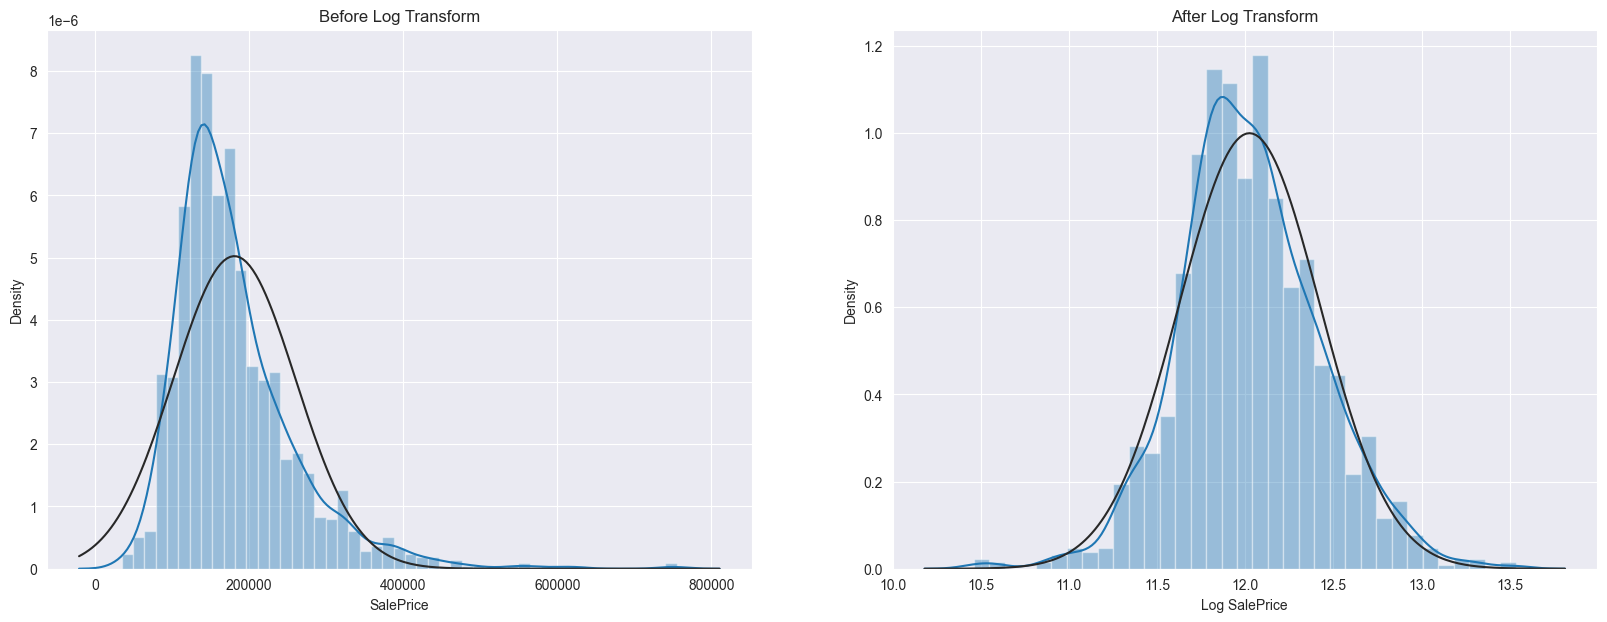

In [40]:
plt.figure(figsize=(20,7))

plt.subplot(1, 2, 1)
sns.distplot(y_train, kde=True, fit=scipy.stats.norm)
plt.title("Before Log Transform")

plt.subplot(1, 2, 2)
sns.distplot(np.log(y_train), kde=True, fit=scipy.stats.norm)
plt.xlabel("Log SalePrice")
plt.title("After Log Transform")

plt.show()

In [41]:
log_y_train = np.log(y_train)

In [42]:
log_y_train

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
          ...    
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12.128111
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: SalePrice, Length: 1460, dtype: float64

# Modelling

In [56]:
models={
    "Catboost":CatBoostRegressor(verbose=0),
    "XGBRegressor":XGBRegressor(),
    "lightGBM":LGBMRegressor(),
    "RandomForest":RandomForestRegressor(),
    "Ridge":Ridge()
    
}

In [57]:
results = {}
for name, model in models.items():
    result = np.exp(np.sqrt(-cross_val_score(model, X_train, log_y_train, scoring='neg_mean_squared_error', cv=KFold(n_splits=5))))
    results[name] = result

In [58]:
results

{'Catboost': array([1.11359979, 1.13524549, 1.13398714, 1.11873415, 1.13180123]),
 'XGBRegressor': array([1.13604014, 1.16533187, 1.16036783, 1.14162793, 1.16298257]),
 'lightGBM': array([1.12770308, 1.14956042, 1.14595614, 1.1260523 , 1.14075514]),
 'RandomForest': array([1.14191037, 1.16308831, 1.15345398, 1.13545254, 1.1616377 ]),
 'Ridge': array([1.11729849, 1.14661696, 1.14212339, 1.12391785, 1.15487266])}

In [120]:
normal={}
for name,values in results.items():
    print("-------------------\n" + name)
    print(f"mean of rmse: {round(np.mean(values),4)}")
    print(f"std of rmse: {round(np.std(values),4)}")

-------------------
Catboost
mean of rmse: 1.1267
std of rmse: 0.0088
-------------------
XGBRegressor
mean of rmse: 1.1533
std of rmse: 0.012
-------------------
lightGBM
mean of rmse: 1.138
std of rmse: 0.0095
-------------------
RandomForest
mean of rmse: 1.1511
std of rmse: 0.0109
-------------------
Ridge
mean of rmse: 1.137
std of rmse: 0.0141


In [122]:
for key,value in models.items():
    model=value
    model.fit(X_train, log_y_train)
    print(key+" trained")

Catboost trained
XGBRegressor trained
lightGBM trained
RandomForest trained
Ridge trained


# Bagging Ensemble 

In [129]:
final_y_pred = (
    0.3 * np.exp(models['Catboost'].predict(X_test)) +
    0.1 * np.exp(models['XGBRegressor'].predict(X_test)) +
    0.25 * np.exp(models['lightGBM'].predict(X_test)) +
    0.1 * np.exp(models['RandomForest'].predict(X_test)) +
    0.25 * np.exp(models['Ridge'].predict(X_test))
)

In [130]:
final_y_pred

array([121757.04144035, 161938.34803464, 185695.78982247, ...,
       154725.12031163, 114580.54086807, 210660.4881163 ])

# Submission

In [131]:
sub = pd.concat([test_id, pd.Series(final_y_pred, name='SalePrice')], axis=1)
sub

,Id,SalePrice
0,1461,121757.041440
1,1462,161938.348035
2,1463,185695.789822
3,1464,190848.392725
4,1465,192674.962459
5,1466,175574.658579
6,1467,175207.844634
7,1468,166124.992546
8,1469,184867.992000
9,1470,122062.246289


In [132]:
sub.to_csv('./submission.csv', index=False, header=True)

In [ ]:
# score: 0.12038
# rank: 291